Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv

tqdm.pandas()
sns.set_style('dark')
plt.rcParams['figure.figsize'] = (20,8)
plt.rcParams['font.size'] = 14

Connecting to drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/cnn_dailymail/train.csv', delimiter=',',
                   quotechar='"',
                   encoding='iso-8859-1',
                   error_bad_lines=False)
data.head()

<ipython-input-42-bd47a6b8d18d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/cnn_dailymail/train.csv', delimiter=',',


,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


Text Preprocessing

In [ ]:
def text_cleaning(x):

    text = re.sub('\s+\n+', ' ', x)
    text = re.sub('[^a-zA-Z0-9\.]', ' ', text)
    text = text.split()

    text = [word for word in text]
    text = ' '.join(text)
    text = 'startseq '+text+' endseq'

    return text

In [ ]:
print(data.columns)

Index(['id', 'article', 'highlights'], dtype='object')


In [ ]:

data['article'] = data['article'].progress_apply(text_cleaning)

#data.set_index('article', inplace=True)

print(data.head())

100%|██████████| 287113/287113 [02:01<00:00, 2361.46it/s]

                                         id  \
0  0001d1afc246a7964130f43ae940af6bc6c57f01   
1  0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2  00027e965c8264c35cc1bc55556db388da82b07f   
3  0002c17436637c4fe1837c935c04de47adb18e9a   
4  0003ad6ef0c37534f80b55b4235108024b407f0b   

                                             article  \
0  startseq By . Associated Press . PUBLISHED . 1...   
1  startseq CNN Ralph Mata was an internal affair...   
2  startseq A drunk driver who killed a young wom...   
3  startseq CNN With a breezy sweep of his pen Pr...   
4  startseq Fleetwood are the only team still to ...   

                                          highlights  
0  Bishop John Folda, of North Dakota, is taking ...  
1  Criminal complaint: Cop used his role to help ...  
2  Craig Eccleston-Todd, 27, had drunk at least t...  
3  Nina dos Santos says Europe must be ready to a...  
4  Fleetwood top of League One after 2-0 win at S...  


In [ ]:
# Apply text_cleaning function to 'article' column
data['highlights'] = data['highlights'].progress_apply(text_cleaning)

# Set 'article' as the index again
#data.set_index('highlights', inplace=True)

# Now 'article' is the index, and you have cleaned the text data
print(data.head())

100%|██████████| 287113/287113 [00:10<00:00, 27885.73it/s]

                                         id  \
0  0001d1afc246a7964130f43ae940af6bc6c57f01   
1  0002095e55fcbd3a2f366d9bf92a95433dc305ef   
2  00027e965c8264c35cc1bc55556db388da82b07f   
3  0002c17436637c4fe1837c935c04de47adb18e9a   
4  0003ad6ef0c37534f80b55b4235108024b407f0b   

                                             article  \
0  startseq By . Associated Press . PUBLISHED . 1...   
1  startseq CNN Ralph Mata was an internal affair...   
2  startseq A drunk driver who killed a young wom...   
3  startseq CNN With a breezy sweep of his pen Pr...   
4  startseq Fleetwood are the only team still to ...   

                                          highlights  
0  startseq Bishop John Folda of North Dakota is ...  
1  startseq Criminal complaint Cop used his role ...  
2  startseq Craig Eccleston Todd 27 had drunk at ...  
3  startseq Nina dos Santos says Europe must be r...  
4  startseq Fleetwood top of League One after 2 0...  


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import Sequence
from keras.utils import to_categorical

Train-Test Split

In [ ]:
train = data.iloc[:5000, :]
val = data.iloc[:1250, :].reset_index(drop=True)
test = data.iloc[3999:5000, :].reset_index(drop=True)

Tokenization

In [ ]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train['article'].tolist())
max_length = max(len(caption.split()) for caption in train['article'].tolist())

Sorting Vocabulary words (by count)

In [ ]:
df_vocab = pd.DataFrame(list(tokenizer.word_counts.items()), columns=['word','count'])
df_vocab.sort_values(by='count', ascending=False, inplace=True, ignore_index=True)
df_vocab.head()

,word,count
0,the,197602
1,to,94759
2,a,85145
3,and,81340
4,of,80223


Vocabulary Visualization (Wordcloud)

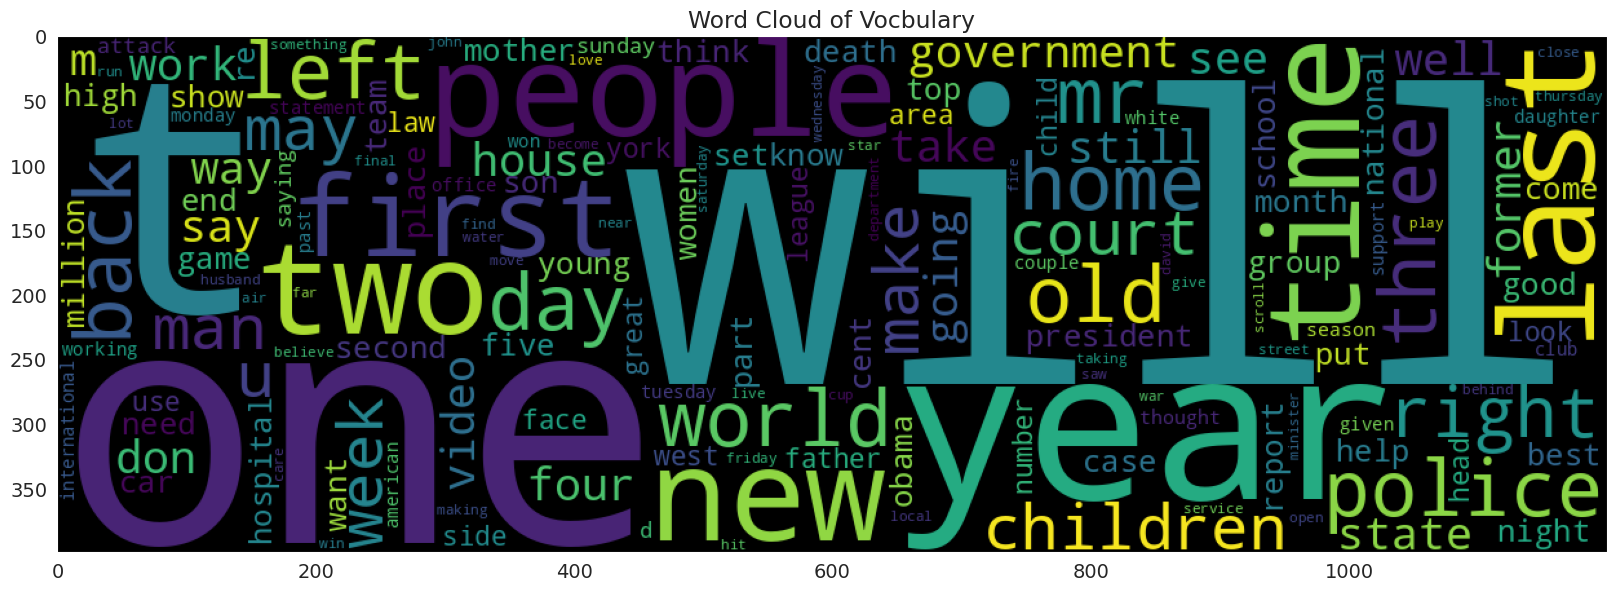

In [ ]:
words = ""
words += " ".join(df_vocab['word'].tolist())+" "
wordcloud = WordCloud(width = 1200, height = 400,
                background_color ='black',
                min_font_size = 10).generate(words)

plt.imshow(wordcloud)
plt.title('Word Cloud of Vocbulary')
plt.show()

Descriptive Stats

In [ ]:
df_vocab.describe()

,count
count,68592.000000
mean,51.241632
std,1151.711811
min,1.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,197602.000000


In [ ]:
df_vocab[df_vocab['count']>=50]

,word,count
0,the,197602
1,to,94759
2,a,85145
3,and,81340
4,of,80223
...,...,...
6063,withdrawn,50
6064,yemeni,50
6065,acknowledge,50
6066,condolences,50


Limiting Vocab Size via Tokenizer

In [ ]:
vocab_size = len(df_vocab[df_vocab['count']>=50])
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train['article'].tolist())

Analyzing sentence length

In [ ]:
data['length'] = data['article'].progress_apply(lambda x: len(x.split(' ')))

100%|██████████| 287113/287113 [00:11<00:00, 25704.02it/s]


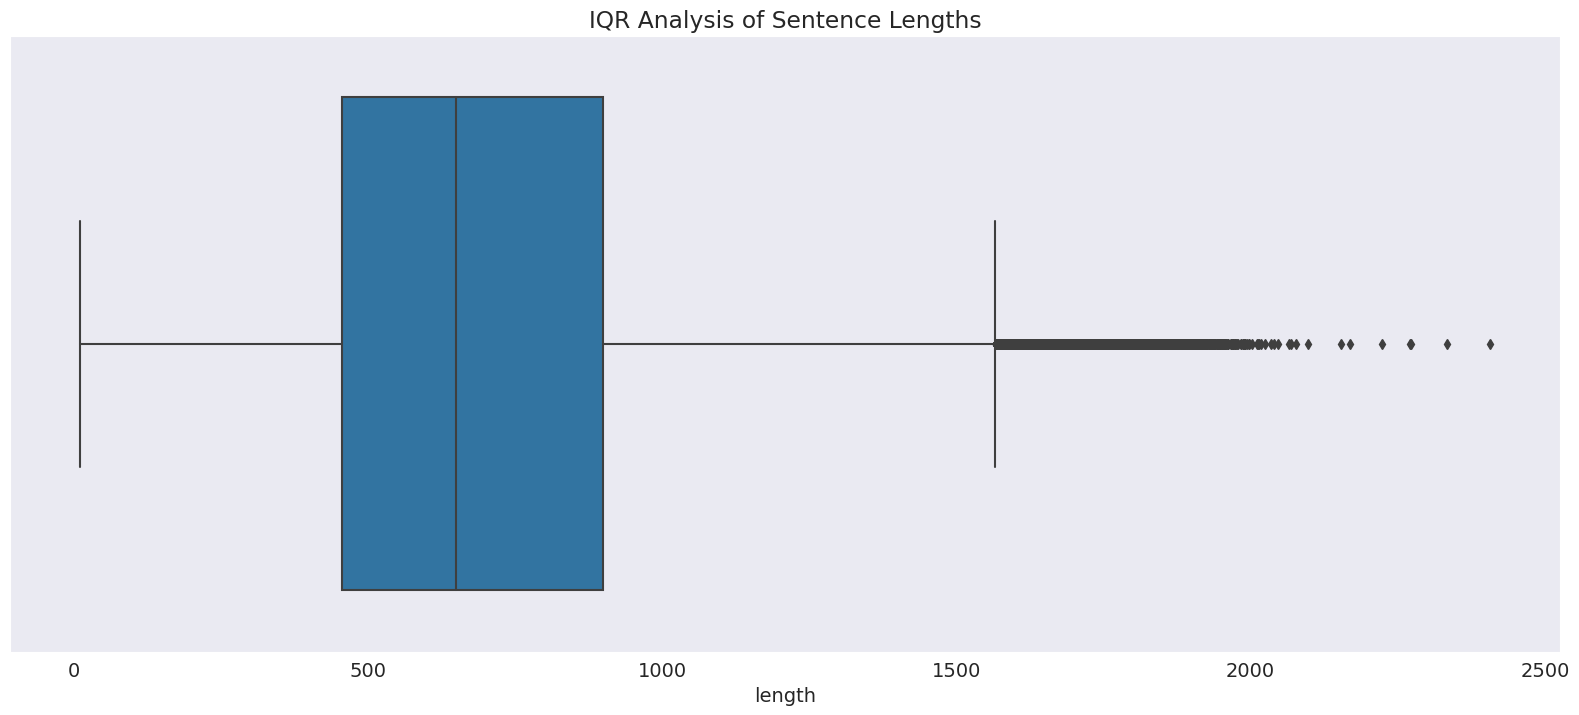

In [ ]:
sns.boxplot(x='length', data=data)
plt.title('IQR Analysis of Sentence Lengths')
plt.show()

In [ ]:
data.describe()

,length
count,287113.000000
mean,710.445703
std,344.261076
min,11.000000
25%,456.000000
50%,649.000000
75%,900.000000
max,2406.000000


Setting max_length analyzing the box plot

In [ ]:
max_length = 50
print(train.loc[0, 'article'])
print(tokenizer.texts_to_sequences([train.loc[0, 'article']])[0])

startseq By . Associated Press . PUBLISHED . 14 11 EST 25 October 2013 . . UPDATED . 15 36 EST 25 October 2013 . The bishop of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo Grand Forks and Jamestown to the hepatitis A virus in late September and early October. The state Health Department has issued an advisory of exposure for anyone who attended five churches and took communion. Bishop John Folda pictured of the Fargo Catholic Diocese in North Dakota has exposed potentially hundreds of church members in Fargo Grand Forks and Jamestown to the hepatitis A . State Immunization Program Manager Molly Howell says the risk is low but officials feel it s important to alert people to the possible exposure. The diocese announced on Monday that Bishop John Folda is taking time off after being diagnosed with hepatitis A. The diocese says he contracted the infection through contaminated food while attending a conference for newly ordained bis

Data Generation (predicting next words from current ones)

In [ ]:
seq = train.loc[0, 'article'].split()
X, y = [], []
for i in range(1,len(seq)):
    in_seq, out_seq = seq[:i], seq[i]
    X.append(' '.join(in_seq))
    y.append(out_seq)

example = pd.DataFrame(columns=['input','output'])
example['input'] = X
example['output'] = y
example

,input,output
0,startseq,By
1,startseq By,.
2,startseq By .,Associated
3,startseq By . Associated,Press
4,startseq By . Associated Press,.
...,...,...
196,startseq By . Associated Press . PUBLISHED . 1...,bishop
197,startseq By . Associated Press . PUBLISHED . 1...,is
198,startseq By . Associated Press . PUBLISHED . 1...,located
199,startseq By . Associated Press . PUBLISHED . 1...,.


In [ ]:
class CustomDataGenerator(Sequence):

    def __init__(self, df, X_col, batch_size, tokenizer, vocab_size, max_length, shuffle=True):

        self.df = df.copy()
        self.X_col = X_col
        self.batch_size = batch_size
        self.tokenizer = tokenizer
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.shuffle = shuffle
        self.n = len(self.df)

    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __len__(self):
        return self.n // self.batch_size

    def __getitem__(self,index):

        batch = self.df.iloc[index * self.batch_size:(index + 1) * self.batch_size,:]
        X, y = self.__get_data(batch)
        return X, y

    def __get_data(self,batch):

        X, y = list(), list()
        captions = batch.loc[:, self.X_col].tolist()
        for caption in captions:
            seq = self.tokenizer.texts_to_sequences([caption])[0]
            max_len = self.max_length if len(seq) > self.max_length else len(seq)
            for i in range(1,max_len):
                in_seq, out_seq = seq[:i], seq[i]
                in_seq = pad_sequences([in_seq], maxlen=self.max_length)[0]
                out_seq = to_categorical([out_seq], num_classes=self.vocab_size)[0]
                X.append(in_seq)
                y.append(out_seq)

        X, y = np.array(X), np.array(y)

        return X, y

In [ ]:
train_gen = CustomDataGenerator(train, 'article', 16, tokenizer, vocab_size, max_length)
val_gen = CustomDataGenerator(val, 'article', 16, tokenizer, vocab_size, max_length)
test_gen = CustomDataGenerator(test, 'article', 16, tokenizer, vocab_size, max_length)

Modelling using Bidirectional LSTM (RNNs)

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import (Embedding, LSTM, add, Concatenate, Reshape,
                                     concatenate, Bidirectional, Dense, Input)

In [ ]:
input_layer = Input(shape=(50,))
x = Embedding(vocab_size, 64)(input_layer)
x = Bidirectional(LSTM(100))(x)
output_layer = Dense(vocab_size, activation='softmax')(x)

model = Model(inputs=[input_layer], outputs=output_layer)
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam())

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 50, 64)            388352    
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               132000    
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6068)              1219668   
                                                                 
Total params: 1740020 (6.64 MB)
Trainable params: 1740020 (6.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler

In [ ]:
model_name = "model.h5"
checkpoint = ModelCheckpoint(model_name,
                            monitor="val_loss",
                            mode="min",
                            save_best_only = True,
                            verbose=1)

es = EarlyStopping(monitor='val_loss',min_delta = 0, patience = 5, verbose = 1, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 8:
        return lr
    else:
        return lr * tf.math.exp(-0.1*epoch)


lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=25, callbacks=[checkpoint, es, lr_scheduler])


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/25
311/312 [============================>.] - ETA: 0s - loss: 6.4923
Epoch 1: val_loss improved from inf to 6.21327, saving model to model.h5
312/312 [==============================] - 37s 105ms/step - loss: 6.4922 - val_loss: 6.2133 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/25


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


312/312 [==============================] - ETA: 0s - loss: 6.0793
Epoch 2: val_loss improved from 6.21327 to 5.84204, saving model to model.h5
312/312 [==============================] - 22s 71ms/step - loss: 6.0793 - val_loss: 5.8420 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/25
312/312 [==============================] - ETA: 0s - loss: 5.7137
Epoch 3: val_loss improved from 5.84204 to 5.57266, saving model to model.h5
312/312 [==============================] - 24s 75ms/step - loss: 5.7137 - val_loss: 5.5727 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/25
311/312 [============================>.] - ETA: 0s - loss: 5.5155
Epoch 4: val_loss improved from 5.57266 to 5.42336, saving model to model.h5
312/312 [==============================] - 22s 70ms/step - loss: 5.5163 - val_loss: 5.4234 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to 0.001000000047497451

Model Inferences

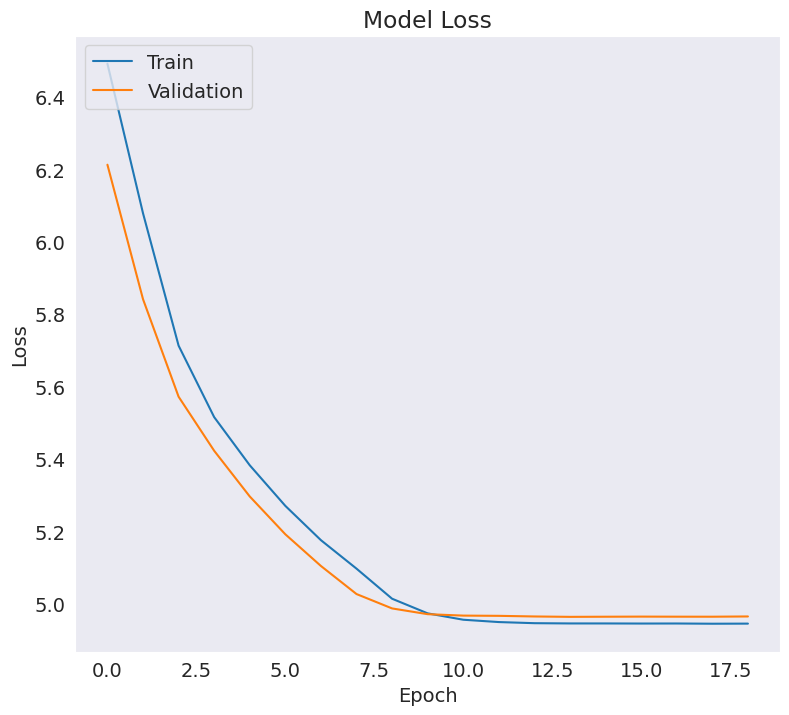

In [ ]:
import matplotlib.pyplot as plt

# Assuming history contains accuracy and val_accuracy
plt.figure(figsize=(20, 8))


# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
def idx_to_word(integer,tokenizer):

    for word, index in tokenizer.word_index.items():
        if index==integer:
            return word
    return None

Greedy Search Decoding

In [ ]:
def predict_sentence(text, model, tokenizer, max_length):

    in_text = "startseq " + text
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)

        y_pred = model.predict(sequence, verbose=0)
        y_pred = np.argmax(y_pred, axis=1)

        word = idx_to_word(y_pred, tokenizer)

        if word is None:
            break

        in_text+= " " + word

        if word == 'endseq':
            break

    return in_text

Beam Search Decoding

In [ ]:
def beam_search_predictions(text, beam_index = 3):
    in_text = "startseq " + text
    start = tokenizer.texts_to_sequences([in_text])[0]
    start_word = [[start, 0.0]]
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            par_caps = pad_sequences([s[0]], maxlen=max_length)
            preds = model.predict(par_caps, verbose=0)
            word_preds = np.argsort(preds[0])[-beam_index:]
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                prob += preds[0][w]
                temp.append([next_cap, prob])

        start_word = temp
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])
        start_word = start_word[-beam_index:]

    start_word = start_word[-1][0]
    intermediate_caption = [idx_to_word(i, tokenizer) for i in start_word]
    final_caption = []

    for i in intermediate_caption:
        if i != 'endseq':
            final_caption.append(i)
        else:
            break

    final_caption = ' '.join(final_caption[1:])
    return final_caption

Outcome

In [ ]:
sentences = ["overall the product is okay",
             "exactly like picture",
             "price could have been cheaper",
             "will recommend this item",
             "useful packaging"]

for sentence in sentences:
    print("Greedy Search: ", predict_sentence(sentence, model, tokenizer, 50))
    print("Beam Search: ", beam_search_predictions(sentence))
    print("\n")

Greedy Search:  startseq overall the product is okay to <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
Beam Search:  overall the product is okay to the <OOV> of <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>


Greedy Search:  startseq exactly like picture of the <OOV> of <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
Beam Search: